In [1]:
#Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing the Training Set
dataset_train = pd.read_csv("RNN.csv")
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
#Create a data structure with 60 timestamps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train), np.array(y_train)

#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
#Importing the Keras Libraries and Packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [6]:
#Initializing the RNN
regressor = Sequential()

In [7]:
#Adding the First LSTM Layer and some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
#Adding the Second LSTM Layer and some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [9]:
#Adding Third LSTM Layer and some Dropout Regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [10]:
#Adding Fourth LSTM Layer and some Dropout Regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [11]:
#Adding the Output Layer
regressor.add(Dense(units = 1))

In [13]:
#Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [14]:
#Fitting the RNN into Training Set
regressor.fit(X_train,y_train, epochs = 100, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 95s 80ms/step - loss: 0.0072
Epoch 2/100
1198/1198 [==============================] - 49s 41ms/step - loss: 0.0014
Epoch 3/100
1198/1198 [==============================] - 49s 41ms/step - loss: 9.4779e-04
Epoch 4/100
1198/1198 [==============================] - 49s 41ms/step - loss: 8.9125e-04
Epoch 5/100
1198/1198 [==============================] - 53s 44ms/step - loss: 7.6213e-04
Epoch 6/100
1198/1198 [==============================] - 51s 42ms/step - loss: 9.5026e-04
Epoch 7/100
1198/1198 [==============================] - 49s 41ms/step - loss: 8.1551e-04
Epoch 8/100
1198/1198 [==============================] - 49s 41ms/step - loss: 7.3927e-04
Epoch 9/100
1198/1198 [==============================] - 48s 40ms/step - loss: 7.1243e-04
Epoch 10/100
1198/1198 [==============================] - 50s 42ms/step - loss: 6.9011e-04
Epoch 11/100
1198/1198 [==============================] - 4

1198/1198 [==============================] - 41s 34ms/step - loss: 1.6047e-04
Epoch 93/100
1198/1198 [==============================] - 42s 35ms/step - loss: 1.5488e-04
Epoch 94/100
1198/1198 [==============================] - 41s 34ms/step - loss: 1.7207e-04
Epoch 95/100
1198/1198 [==============================] - 41s 34ms/step - loss: 1.6074e-04
Epoch 96/100
1198/1198 [==============================] - 42s 35ms/step - loss: 1.7351e-04
Epoch 97/100
1198/1198 [==============================] - 41s 34ms/step - loss: 1.6240e-04
Epoch 98/100
1198/1198 [==============================] - 44s 37ms/step - loss: 1.5216e-04
Epoch 99/100
1198/1198 [==============================] - 41s 34ms/step - loss: 1.5281e-04
Epoch 100/100
1198/1198 [==============================] - 41s 34ms/step - loss: 1.5361e-04


In [16]:
#Load the Real Stock Price of 2019
dataset_test = pd.read_csv("RNN_Test.csv")
real_stock_price = dataset_test.iloc[:, 1:2].values

In [19]:
#Getting the Predicted Stock Price of 2019
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

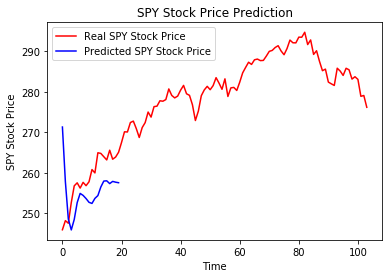

In [20]:
#Visualizing the Results
plt.plot(real_stock_price, color = 'red', label = 'Real SPY Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted SPY Stock Price')
plt.title('SPY Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('SPY Stock Price')
plt.legend()
plt.show()